In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("E:\\NDownloads\\amazon.csv",encoding = 'latin1')
df = data.copy()
df.head(10)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
5,2003,Acre,Janeiro,10.0,2003-01-01
6,2004,Acre,Janeiro,0.0,2004-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01
9,2007,Acre,Janeiro,0.0,2007-01-01


In [18]:
statistics = df['number'].describe().reset_index()
statistics.style.format({"number": "{:20,.0f}"}).hide_index().highlight_max(color='#FFB27A')

index,number
count,"6,454"
mean,108
std,191
min,0
25%,3
50%,24
75%,113
max,998


In [19]:
# Recode months into english
df['month'].replace(to_replace = 'Janeiro', value = 'Jan', inplace = True)
df['month'].replace(to_replace = 'Fevereiro', value = 'Feb', inplace = True)
df['month'].replace(to_replace = 'Março', value = 'Mar', inplace = True)
df['month'].replace(to_replace = 'Abril', value = 'Apr', inplace = True)
df['month'].replace(to_replace = 'Maio', value = 'May', inplace = True)
df['month'].replace(to_replace = 'Junho', value = 'Jun', inplace = True)
df['month'].replace(to_replace = 'Julho', value = 'Jul', inplace = True)
df['month'].replace(to_replace = 'Agosto', value = 'Aug', inplace = True)
df['month'].replace(to_replace = 'Setembro', value = 'Sep', inplace = True)
df['month'].replace(to_replace = 'Outubro', value = 'Oct', inplace = True)
df['month'].replace(to_replace = 'Novembro', value = 'Nov', inplace = True)
df['month'].replace(to_replace = 'Dezembro', value = 'Dec', inplace = True)

In [21]:
# Group data by year, state, month
year_mo_state = df.groupby(by = ['year','state', 'month']).sum().reset_index()

year_mo_state.head(10)

,year,state,month,number
0,1998,Acre,Apr,0.0
1,1998,Acre,Aug,130.0
2,1998,Acre,Dec,7.0
3,1998,Acre,Feb,0.0
4,1998,Acre,Jan,0.0
5,1998,Acre,Jul,37.0
6,1998,Acre,Jun,3.0
7,1998,Acre,Mar,0.0
8,1998,Acre,May,0.0
9,1998,Acre,Nov,0.0


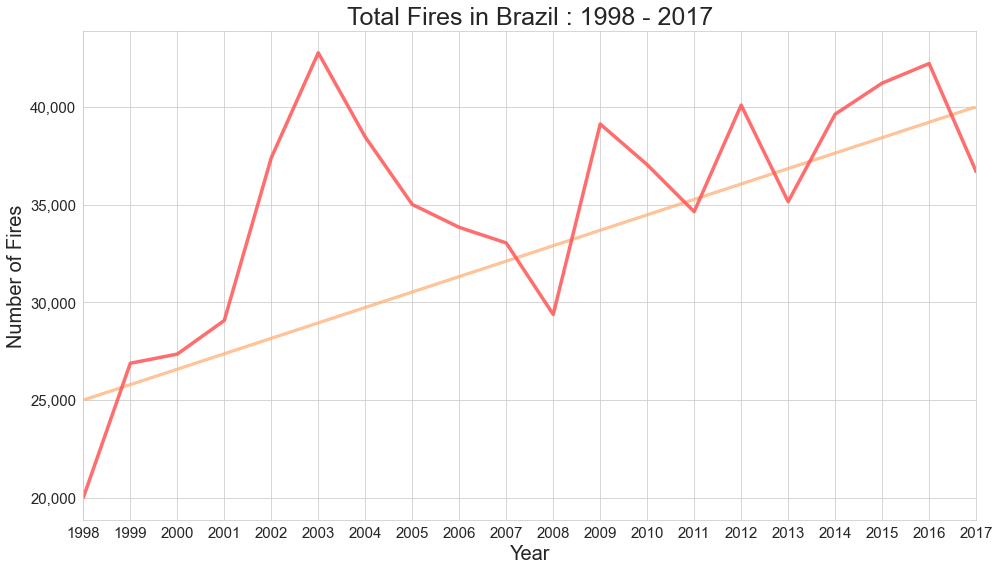

In [30]:
# Set up the defaults
sns.set_style('whitegrid')
from matplotlib.pyplot import MaxNLocator, FuncFormatter

plt.figure(figsize=(16,9))
# Make the plot
ax = sns.lineplot(x = 'year', y = 'number', data = year_mo_state, estimator = 'sum', color = '#FF5555', 
                  lw = 3.5, err_style = None , alpha = 0.85)
# Create a line
import pylab as p
p.arrow( 1998, 25000, 19, 15000, facecolor="#FFB27A", edgecolor="#FFB27A", head_width=0, head_length=0, length_includes_head = False,
       width = 0.15, alpha = 0.7, shape = "full")
# Make pretty
plt.title('Total Fires in Brazil : 1998 - 2017', fontsize = 25)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Number of Fires', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

ax.xaxis.set_major_locator(plt.MaxNLocator(19))
ax.set_xlim(1998, 2017)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))


(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.,
        1600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

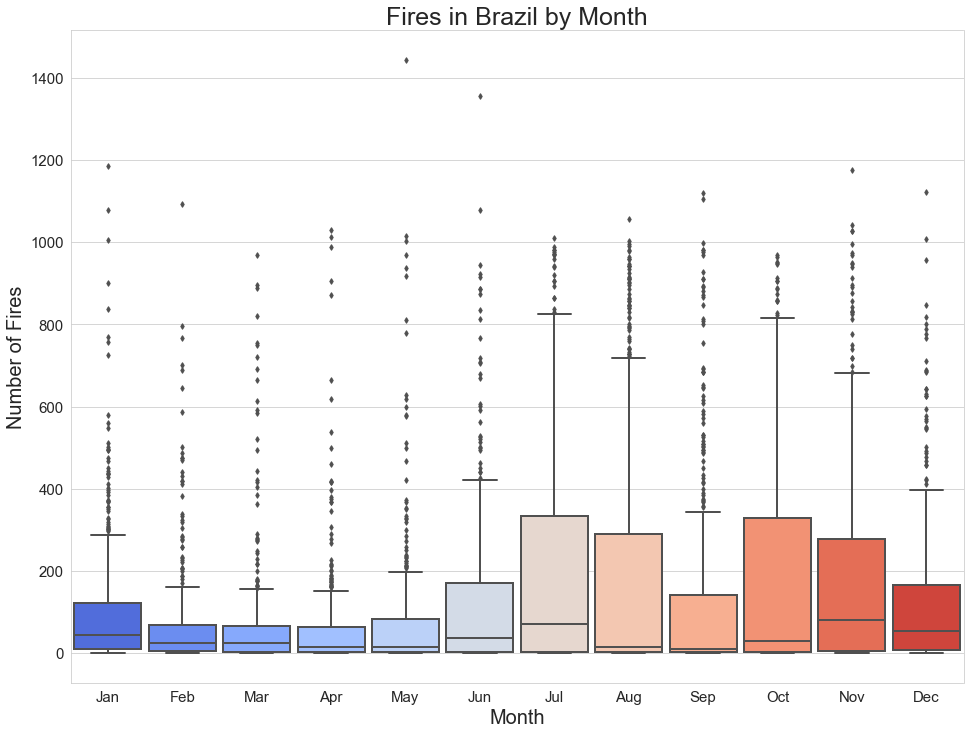

In [31]:
#FIRES COMPARED BY MONTHS
# Figure size
plt.figure(figsize=(16,12))

# The plot
sns.boxplot(x = 'month', order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec'], 
            y = 'number', data = year_mo_state, palette = "coolwarm", saturation = 1, width = 0.9, fliersize=4, linewidth=2)

# Make pretty
plt.title('Fires in Brazil by Month', fontsize = 25)
plt.xlabel('Month', fontsize = 20)
plt.ylabel('Number of Fires', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

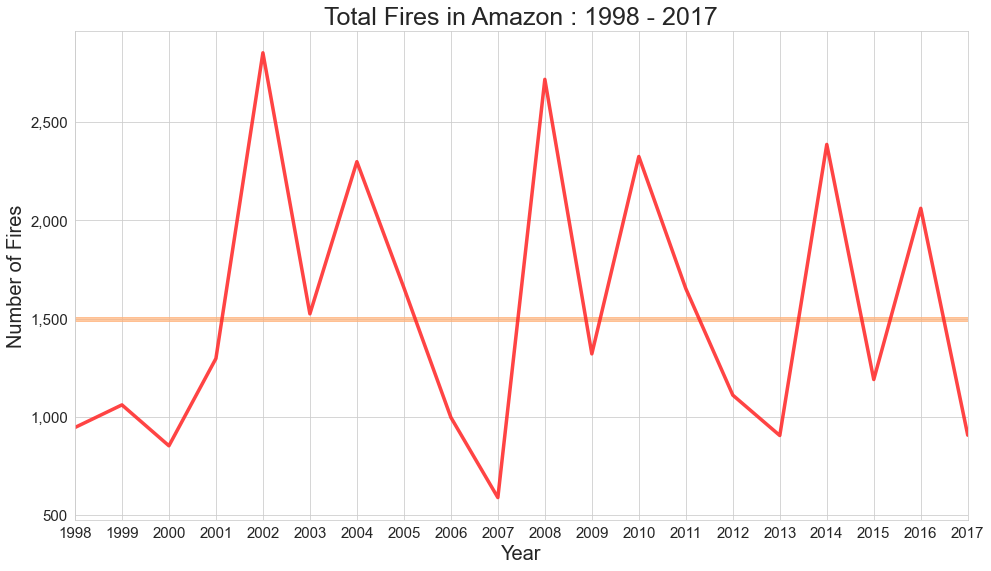

In [32]:
#FIRES IN AMAZON
# First create the data
year_mo_state_Amazon = data[data['state'] == 'Amazonas'].groupby(by = ['year','state', 'month']).sum().reset_index()

# Set up the figure size
plt.figure(figsize=(16,9))

# CReate the plot
ax = sns.lineplot(x = 'year', y = 'number', data = year_mo_state_Amazon, estimator = 'sum', color = '#FF2323', lw = 3.5, 
                  err_style = None, alpha = 0.85)

# Add line
p.arrow( 1998, 1500, 19, 0, facecolor="#FFB27A", edgecolor="#FFB27A", head_width=0, head_length=0, length_includes_head = False,
       width = 20, alpha = 0.7, shape = "full")

# Make pretty
plt.title('Total Fires in Amazon : 1998 - 2017', fontsize = 25)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Number of Fires', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

ax.xaxis.set_major_locator(plt.MaxNLocator(19))
ax.set_xlim(1998, 2017)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))



In [34]:
# Creating the top 10 dataframe
states_fires = data.groupby(by = 'state')['number'].sum().sort_values(ascending = False).head(10).reset_index()
states_fires = states_fires.sort_values(by = 'number', ascending = True)

states_fires.style.highlight_max(color = '#FFB27A')


,state,number
9,Amazonas,30650.129000
8,Tocantins,33707.885000
7,Minas Gerais,37475.258000
6,Goias,37695.520000
5,Piau,37803.747000
4,Bahia,44746.226000
3,Rio,45160.865000
2,Sao Paulo,51121.198000
1,Paraiba,52435.918000
0,Mato Grosso,96246.028000


No handles with labels found to put in legend.


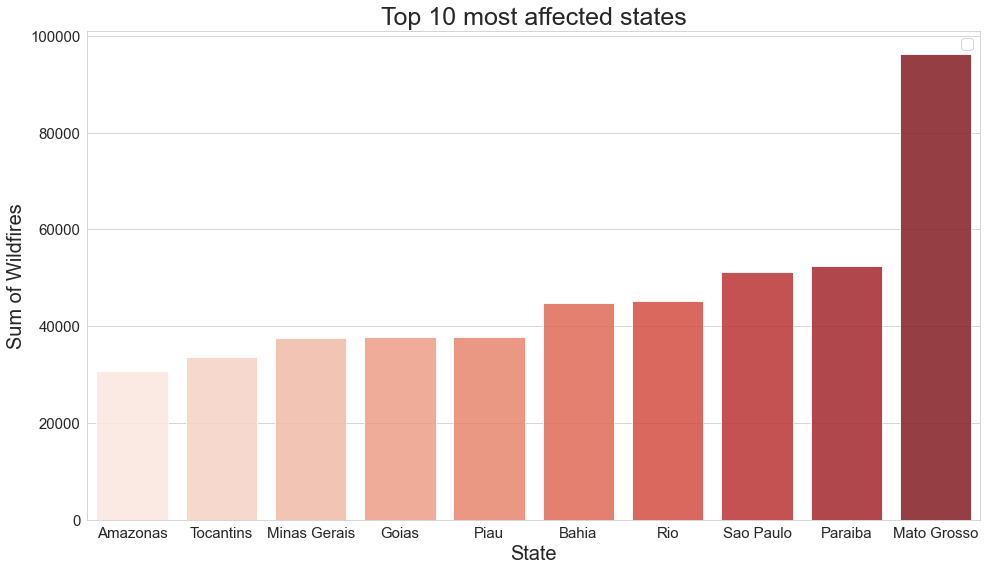

In [35]:
# Set figure size
plt.figure(figsize = (16, 9))

# plot
ax = sns.barplot(x = states_fires['state'], y = states_fires['number'], palette = "Reds", alpha = 0.85)

# Make pretty
plt.title("Top 10 most affected states", fontsize = 25)
plt.xlabel("State", fontsize = 20)
plt.ylabel("Sum of Wildfires", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)

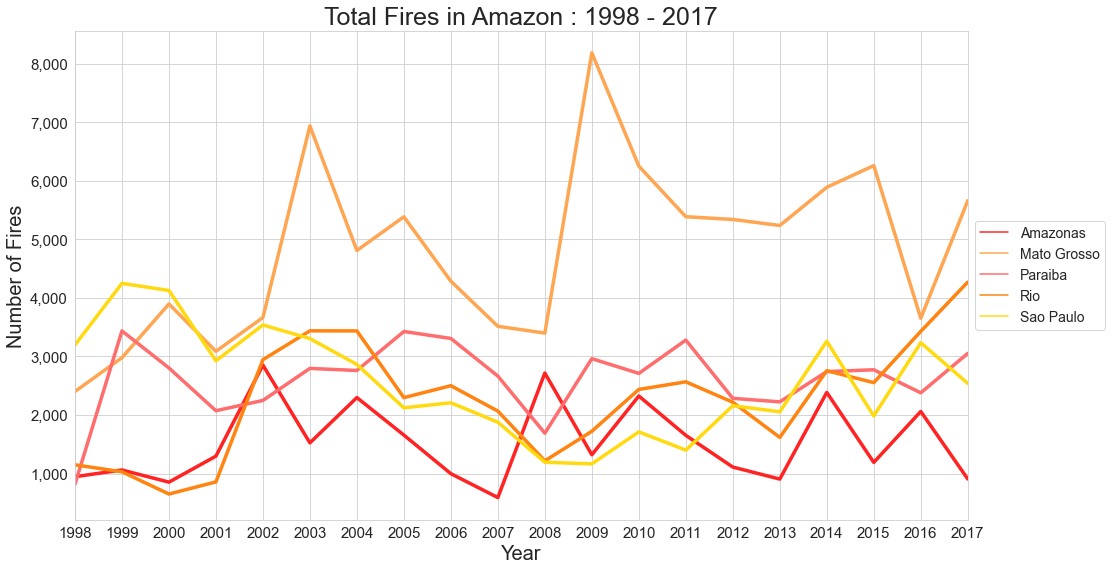

In [36]:
# Prepare the data
year_mo_state_top_states = data[data['state'].isin(['Amazonas','Mato Grosso','Paraiba','Sao Paulo','Rio'])].groupby(by = ['year','state', 'month']).sum().reset_index()

# The plot
plt.figure(figsize=(16,9))
ax = sns.lineplot(x = 'year', y = 'number', data = year_mo_state_top_states, hue = 'state', estimator = 'sum', lw = 3.5, 
                  err_style = None, palette = ["#FF2323", "#FFA653", "#FF6E6E", "#FF8411", "#FFDA11"])

# Make pretty
plt.title('Total Fires in Amazon : 1998 - 2017', fontsize = 25)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Number of Fires', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

ax.xaxis.set_major_locator(plt.MaxNLocator(19))
ax.set_xlim(1998, 2017)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 14})

In [ ]:
Mato Grosso
Mato Grosso is Brazil’s third largest state. This state has a small weight of people from total population of Brazil, about 1.5%, but a very strong agricultural industry.

In the past, the state of Mato Grosso has been one of Brazil’s largest emitters of CO², due to forest fires and deforestation, driven by its strong agriculture based economy.